In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# shortcut to set the max rows that will show.
def set_max_rows(max_rows=20):
    pd.set_option('display.max_rows', max_rows)

# shortcut to set the max digits that will show.
def set_max_digits(max_digits='.3f'):
    max_digits_option = "{:" + max_digits + "}"
    pd.set_option('display.float_format', max_digits_option.format)
    
    
    
set_max_digits()
set_max_rows()

## Discovering The Dataset

In [3]:
# load the udemy courses dataset.
udemy_courses = pd.read_csv('original_udemy_courses.csv')

In [4]:
# show the info of the dataset to see what the features i have and how many null values there.
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9932 non-null   int64  
 1   title                         9932 non-null   object 
 2   url                           9932 non-null   object 
 3   is_paid                       9932 non-null   bool   
 4   num_subscribers               9932 non-null   int64  
 5   avg_rating                    9932 non-null   float64
 6   avg_rating_recent             9932 non-null   float64
 7   rating                        9932 non-null   float64
 8   num_reviews                   9932 non-null   int64  
 9   num_published_lectures        9932 non-null   int64  
 10  num_published_practice_tests  9932 non-null   int64  
 11  created                       9932 non-null   object 
 12  published_time                9932 non-null   object 
 13  dis

In [5]:
# show the aggregate functions to see how the dataset look.
udemy_courses.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price_amount,price_detail_amount
count,9932.000,9932.000,9932.000,9932.000,9932.000,9932.000,9932.000,9932.000,9764.000,9932.000
mean,1579035.118,7410.613,4.073,4.056,4.056,687.042,61.521,0.038,466.730,5254.321
std,836181.866,25891.340,0.497,0.523,0.523,5450.095,71.216,0.351,146.977,3112.627
min,8082.000,20.000,1.400,1.337,1.337,8.000,0.000,0.000,455.000,1280.000
25%,928777.000,375.000,3.800,3.775,3.775,24.000,22.000,0.000,455.000,1600.000
50%,1537401.000,1731.000,4.175,4.167,4.167,60.000,39.000,0.000,455.000,6080.000
75%,2242264.500,5739.000,4.438,4.439,4.439,212.000,72.000,0.000,455.000,8640.000
max,3473846.000,1086954.000,5.000,5.000,5.000,314098.000,779.000,6.000,3200.000,12800.000


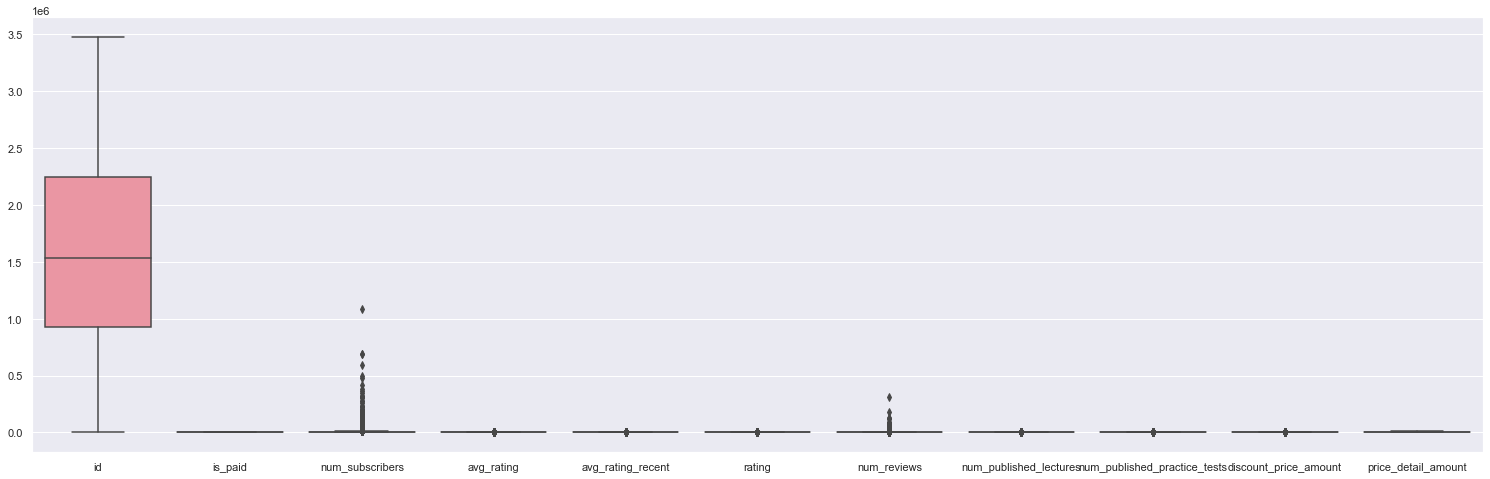

In [6]:
# this function is a shortcut to set the figure to specific size with seaborn.
def set_fig_size(size=(15,8)):
    sns.set(rc = {'figure.figsize':size})

# this function is a shortcut to show boxplot with specific size with seaborn.
def show_boxplot(data, size=(26,8)):
    set_fig_size(size)
    sns.boxplot(data=data)
    

show_boxplot(udemy_courses)

In [7]:
#### show the first 20 courses to discover more about the dataset.
udemy_courses.head(20)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_amount,discount_price_currency,price_detail_amount,price_detail_currency
0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.563,4.567,4.567,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.000,INR,8640,INR
1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.648,4.653,4.653,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.000,INR,8640,INR
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.552,4.549,4.549,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.000,INR,8640,INR
3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.577,4.586,4.586,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.000,INR,8640,INR
4,533682,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,True,497195,4.566,4.572,4.572,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,455.000,INR,8640,INR
5,1362070,"React - The Complete Guide (incl Hooks, React ...",/course/react-the-complete-guide-incl-redux/,True,298871,4.614,4.619,4.619,89164,490,0,2017-09-26T22:20:24Z,2017-10-24T22:03:07Z,455.000,INR,8640,INR
6,903744,Python for Data Science and Machine Learning B...,/course/python-for-data-science-and-machine-le...,True,383073,4.583,4.593,4.593,86226,165,0,2016-07-13T05:22:58Z,2016-09-18T17:36:23Z,462.000,INR,8640,INR
7,1565838,The Complete 2020 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,True,260968,4.698,4.698,4.698,84386,469,0,2018-02-22T12:02:33Z,2018-10-25T21:34:15Z,455.000,INR,8640,INR
8,851712,The Complete JavaScript Course 2020: Build Rea...,/course/the-complete-javascript-course/,True,343599,4.574,4.571,4.571,82317,166,0,2016-05-17T09:31:26Z,2016-10-14T22:52:23Z,455.000,INR,8640,INR
9,258316,Complete C# Unity Game Developer 2D,/course/unitycourse/,True,362891,4.641,4.641,4.641,78378,215,0,2014-07-09T19:17:28Z,2014-09-03T19:30:05Z,481.000,INR,8960,INR


In [8]:
# show the last 20 courses to discover more about the dataset.
udemy_courses.tail(20)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_amount,discount_price_currency,price_detail_amount,price_detail_currency
9912,1427948,Spring 5.0 Project: Building a Travel Website,/course/spring-50-project-building-a-travel-we...,True,69,3.389,3.485,3.485,9,25,0,2017-11-10T10:11:35Z,2017-11-16T06:14:08Z,455.000,INR,8000,INR
9913,3069064,A Practical Guide To Learn Angular From Scratch,/course/a-practical-guide-to-learn-angular-fro...,True,2667,3.389,3.525,3.525,9,7,0,2020-04-29T18:47:06Z,2020-05-07T02:59:08Z,455.000,INR,8640,INR
9914,2328254,How to Import and Export Data in SQL Server (H...,/course/how-import-export-data-sql-server/,True,55,4.500,4.286,4.286,9,22,1,2019-04-18T15:48:28Z,2019-04-24T01:51:40Z,455.000,INR,5120,INR
9915,3138552,Game Audio 101: How to Create Sounds for Games,/course/gameaudio101/,True,49,4.944,4.985,4.985,9,22,0,2020-05-17T14:07:44Z,2020-05-22T17:02:36Z,960.000,INR,3840,INR
9916,830430,Zero To Hero: Apache Maven,/course/zero-to-hero-apache-maven/,True,416,3.722,3.720,3.720,9,36,0,2016-04-24T05:23:48Z,2016-04-26T01:06:11Z,455.000,INR,2240,INR
9917,662650,Native Android 101: A Quickstart to Building A...,/course/native-android-101/,True,25,3.889,3.989,3.989,9,27,0,2015-11-07T02:14:59Z,2016-01-12T18:01:44Z,NaN,NaN,1600,INR
9918,2304934,Machine Learning Projects with Java,/course/machine-learning-projects-with-java/,True,43,3.389,3.355,3.355,9,24,0,2019-04-03T09:02:00Z,2019-04-04T17:40:16Z,455.000,INR,8000,INR
9919,2412354,Introduction to Node js for beginners + game p...,/course/node-course/,True,2130,4.278,4.586,4.586,9,42,0,2019-06-13T18:15:32Z,2019-06-24T19:25:02Z,455.000,INR,1280,INR
9920,1115132,XML XQuery - Crash Course for Beginners,/course/xml-xquery-crash-course-for-beginners/,True,458,3.111,2.892,2.892,9,10,0,2017-02-15T09:04:37Z,2017-02-19T22:52:36Z,455.000,INR,8320,INR
9921,2086360,Professional Swift,/course/professional-swift/,True,70,4.167,4.058,4.058,9,54,0,2018-12-14T09:57:53Z,2018-12-19T02:24:45Z,455.000,INR,8640,INR


In [9]:
# see what the null values "discount_price__amount" represents.
discount_amount_null_mask = udemy_courses['discount_price_amount'].isna()
udemy_courses[discount_amount_null_mask]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_amount,discount_price_currency,price_detail_amount,price_detail_currency
146,1080408,Artificial Intelligence: Reinforcement Learnin...,/course/artificial-intelligence-reinforcement-...,True,38754,4.659,4.610,4.610,7705,107,0,2017-01-17T22:57:25Z,2017-01-27T18:43:16Z,NaN,NaN,1920,INR
177,918390,Natural Language Processing with Deep Learning...,/course/natural-language-processing-with-deep-...,True,37638,4.633,4.556,4.556,5952,95,0,2016-07-30T01:59:11Z,2016-08-09T00:06:54Z,NaN,NaN,1920,INR
228,1141808,Build+Deploy+Test with Jenkins 2.0,/course/working-with-jenkins/,True,67732,4.234,4.239,4.239,4620,50,0,2017-03-11T04:51:39Z,2017-03-21T00:35:01Z,NaN,NaN,1920,INR
292,1153742,Advanced AI: Deep Reinforcement Learning in Py...,/course/deep-reinforcement-learning-in-python/,True,31790,4.562,4.557,4.557,3437,79,0,2017-03-22T07:07:14Z,2017-03-24T20:58:09Z,NaN,NaN,1920,INR
605,1022582,Vue.js Essentials - 3 Course Bundle,/course/vuejs-2-essentials/,True,7159,4.558,4.600,4.600,1501,182,0,2016-11-25T06:22:40Z,2016-12-16T14:59:21Z,NaN,NaN,6400,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9766,1667778,JAVA Immersive Learning Course,/course/java-immersive-learning-course/,True,93,4.929,4.915,4.915,22,115,0,2018-04-29T04:11:09Z,2018-05-29T17:18:34Z,NaN,NaN,3200,INR
9826,17492,Introduction to SQL Training,/course/introduction-to-sql3/,True,305,4.550,4.548,4.548,15,55,0,2012-05-09T18:12:08Z,2012-05-15T17:51:15Z,NaN,NaN,3200,INR
9851,2047757,Servicenow ITOM -Discovery,/course/servicenowdiscovery/,True,30,3.450,3.342,3.342,13,5,1,2018-11-25T17:15:02Z,2019-10-20T20:42:34Z,NaN,NaN,2560,INR
9917,662650,Native Android 101: A Quickstart to Building A...,/course/native-android-101/,True,25,3.889,3.989,3.989,9,27,0,2015-11-07T02:14:59Z,2016-01-12T18:01:44Z,NaN,NaN,1600,INR


In [10]:
# check if is there any course its "discount_price__amount" equal  to zero
discount_amount_zero_mask = udemy_courses['discount_price_amount'] == 0
udemy_courses[discount_amount_zero_mask]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_amount,discount_price_currency,price_detail_amount,price_detail_currency


In [11]:
# check what the type of "created" column
type(udemy_courses['created'][0])

str

In [12]:
# check what the type of "published_time" column
type(udemy_courses['published_time'][0])

str

In [13]:
# see is all courses is paid
udemy_courses['is_paid'].value_counts()

True    9932
Name: is_paid, dtype: int64

In [14]:
# show the first 20 courses,
# and see what the difference between "title" and "url" columns and how represents the name of the course
udemy_courses[['title', 'url']].head(20)

,title,url
0,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/
1,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/
2,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/
3,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/
4,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/
5,"React - The Complete Guide (incl Hooks, React ...",/course/react-the-complete-guide-incl-redux/
6,Python for Data Science and Machine Learning B...,/course/python-for-data-science-and-machine-le...
7,The Complete 2020 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/
8,The Complete JavaScript Course 2020: Build Rea...,/course/the-complete-javascript-course/
9,Complete C# Unity Game Developer 2D,/course/unitycourse/



---

### I Discovered the following:
- rating column is duplicte of avg_rating_recent column.
- the currency that used in the data INR (INR is Indian currency).
- the nan values that in "discount_price__amount" and "discount_price__currency" columns are represents that there is no discount in that course.
- the date and time in the dataset are string.
- all courses in the dataset is paid.
- there some columns have outliers.

### Actions I will take to prepare and clean the data:
I will create new data frame that has the same dataset with the following differences:
- remove (url, avg_rating_recent, rating, created, published_time, discount_price_currency, price_detail_currency) columns, they didn't give any useful info about the analysis.
- create new column its name is "year", and it will have only the year of "published_time".
- convert the INR currency to SR, and make it only one column, its name is currency.
- replace the nan values in "discount_price__amount" column to 0.
- add new columns that will have keywords based on title filtering to make the analysis easier.
- clean the outliers.

In [15]:
# copy the [id, title] columns from the original dataset.
cleaned_courses = udemy_courses[['id', 'title']].copy()

# remove the extra whitespaces on the edges from the title column.
cleaned_courses['title'] = cleaned_courses['title'].str.strip()

cleaned_courses

,id,title
0,567828,2020 Complete Python Bootcamp: From Zero to He...
1,625204,The Web Developer Bootcamp
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...
3,756150,Angular - The Complete Guide (2020 Edition)
4,533682,Java Programming Masterclass for Software Deve...
...,...,...
9927,2491260,Simple image classification using KNN
9928,2533542,Spring AOP Crash Course
9929,2552283,Google Chrome Extensions | Create Awesome Exte...
9930,96808,Advanced Java Programming (Java SE 7)


In [16]:
# copy the [num_subscribers,avg_rating,num_reviews,num_published_lectures,num_published_practice_tests]_
# _columns from the original dataset.
cleaned_courses[['num_subscribers',
                 'avg_rating',
                 'num_reviews',
                 'num_lectures',
                 'num_practice_tests']] = udemy_courses[['num_subscribers',
                                                                   'avg_rating',
                                                                   'num_reviews',
                                                                   'num_published_lectures',
                                                                   'num_published_practice_tests']].copy()

In [17]:
# convert the published_time column from original dataset to Timestamp and get the years 
# and add them to year column into the new dataset.
published_time = pd.to_datetime(udemy_courses['published_time'])
cleaned_courses['year'] = published_time.apply(lambda time: time.year)

In [18]:
# this is the factor to convert INR amount to SR amount.
sr_factor = 0.050

# copy (price and discount) amounts columns and rename them.
amounts = udemy_courses[['price_detail_amount', 'discount_price_amount']].copy()
new_names = {'price_detail_amount': 'price_amount', 'discount_price_amount': 'discount_amount'}
amounts = amounts.rename(columns=new_names)

# replace the discount nan values into 0
amounts.fillna(0, inplace=True)
# convert INR amounts into SR amounts.
amounts *= sr_factor

amounts

,price_amount,discount_amount
0,432.000,22.750
1,432.000,22.750
2,432.000,22.750
3,432.000,23.100
4,432.000,22.750
...,...,...
9927,64.000,22.750
9928,64.000,22.750
9929,320.000,22.750
9930,128.000,0.000


In [19]:
# apppend the (price, discount, cuurency) columns.
cleaned_courses[['price_amount', 'discount_amount']] = amounts[['price_amount', 'discount_amount']]
cleaned_courses['currency'] = 'SR'

In [20]:
cleaned_courses.head()

,id,title,num_subscribers,avg_rating,num_reviews,num_lectures,num_practice_tests,year,price_amount,discount_amount,currency
0,567828,2020 Complete Python Bootcamp: From Zero to He...,1086954,4.563,314098,152,0,2015,432.000,22.750,SR
1,625204,The Web Developer Bootcamp,592474,4.648,181621,405,0,2015,432.000,22.750,SR
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,687330,4.552,131007,323,0,2016,432.000,22.750,SR
3,756150,Angular - The Complete Guide (2020 Edition),417746,4.577,128705,455,0,2016,432.000,23.100,SR
4,533682,Java Programming Masterclass for Software Deve...,497195,4.566,122306,400,0,2015,432.000,22.750,SR


In [21]:
# this method is for clean the outliers by set them to min and max ranges of specific column on the data frame.
def clean_outliers(df, target_column):
    column = df[target_column].copy()
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    
    min_outliers_mask = column < min_range
    max_outliers_mask = column > max_range
    
    column[min_outliers_mask] = min_range
    column[max_outliers_mask] = max_range
    
    return column

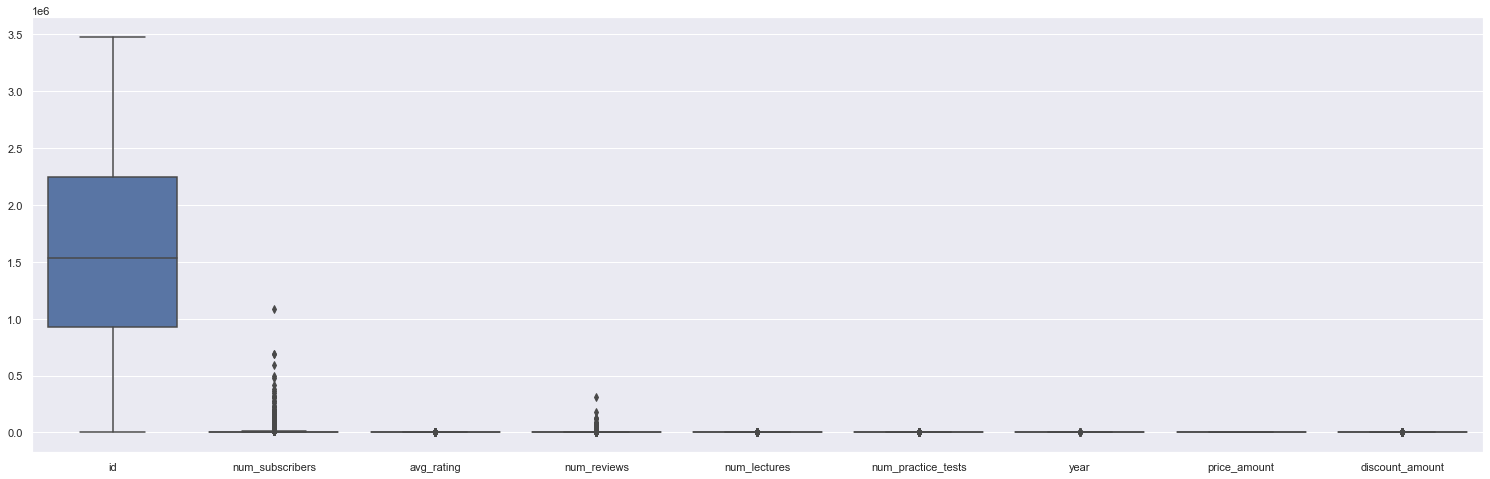

In [22]:
# show box plot before cleaning
show_boxplot(cleaned_courses)

In [23]:
# columns that will clean its outliers.
columns = ['num_subscribers',
           'avg_rating',
           'num_reviews',
           'num_lectures',
           'num_practice_tests',
           'discount_amount']

for column in columns:
    cleaned_courses[column] = clean_outliers(cleaned_courses, column)

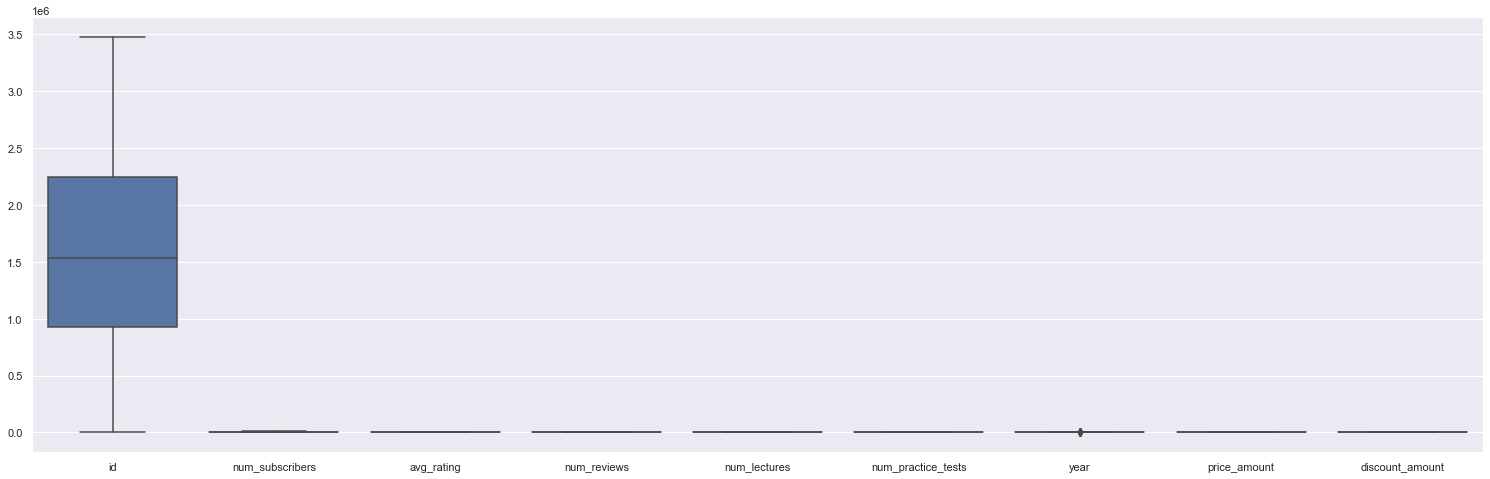

In [24]:
# show box plot after cleaning
show_boxplot(cleaned_courses)

In [25]:
# this method add new column has the specific keywrods based on what the specific words in the title.
# keywords_dic: is a dictionary its key is keywrod and its value is the words the method will filter the title with.
# column_name: the column name that will be added to the data frame.
# after_col_pos: after what column the new column will be added, default is title.
def filter_title_keywrods(keywords_dic, column_name, after_col_pos='title'):
    cleaned_courses_copy = cleaned_courses.copy()
    keywords_dic = {keyword: "|".join(words) for keyword,words in keywords_dic.items()}
    cleaned_courses_copy[column_name] = [[] for e in range(len(cleaned_courses_copy))]
    
    for keyword in keywords_dic:
        keyword_mask = cleaned_courses_copy.title.str.contains(keywords_dic[keyword], case=False)
        cleaned_courses_copy.loc[keyword_mask, column_name].apply(lambda course: course.append(keyword))
        
    keyword_col = cleaned_courses_copy.pop(column_name)
    target_col_pos = cleaned_courses_copy.columns.get_loc(after_col_pos)
    cleaned_courses_copy.insert(target_col_pos+1, column_name, keyword_col)
    return cleaned_courses_copy




# this method gets the rows that its target column has the keywords.
# df: target data frame.
# keywords: the keywords that will filter rows by them.
# target_column: the column that will apply the filter on it.
def get_keywords_mask(df, keywords, target_column):
    filter_mask = None
    if type(keywords) == list:
        filter_mask = df[target_column].apply(
            lambda list_element: any([keyword in list_element for keyword in keywords]) )
    else:
        filter_mask = df[target_column].apply(lambda list_element: keywords in list_element)
        
    return df[filter_mask]



# this method gets unique values of the target column that its elements is lists.
# df: target data frame.
# target_column: target column.
def get_list_unique(df, target_column):
    unique_values = set()
    df[target_column].apply(lambda list_element: [unique_values.add(element) for element in list_element] )
    return pd.Series(list(unique_values))



# this method gets the data frame with the empty elements in the target column.
# df: target data frame.
# target_column: target column.
# reverse: if True it will return non_empty elements.
def get_empty_mask(df, target_column , reverse=False):
    empty_mask = df[target_column].str.len() == 0
    if reverse:
        return df[~empty_mask]
    else:
        return df[empty_mask]



In [26]:
# categories based on list of keywords.
categories = {
    'web': ['js', 'javascript', 'html', 'css', 'web', ' react ', 'angular', 'node', 'php', 'django', 'bootstrap', 'wordpress', 'ASP.NET', 'asp', 'AJAX', 'jquery'],
    'data science': ['google clouds', 'azure', 'AWS', 'data science', 'data analysis', 'python', ' R ', 'R ', 'statistics', 'jupyter', 'pandas', 'numpy', 'big data', 'data visualization'],
    'AI': ['python', 'machine', 'deep', 'AI', 'artificial', 'neural', 'classification', 'regression', 'natural language process', 'nlp'],
    'mobile': ['mobile', 'flutter', 'android', 'ios', 'react native', 'swift', 'dart', 'kotlin', ' app '],
    'python': ['python'],
    'javascript': ['js', 'javascript'],
    'java': ['java', 'spring'],
    'html': ['html'],
    'css': ['css'],
    'c#': ['c\#'],
    'cpp': ['c\+\+'],
    'go': [' go ', 'go ', 'go:'],
    'game development': ['unity', 'unreal', 'game'],
    'database': ['sql', 'mongodb', 'database', 'oracle', 'apache', 'firebase'],
    'software development tools': ['docker', 'git', 'kubernetes', 'devops', 'jira', 'jenkins']
}



# add new column called 'categories' and apply to the categories based on the specific keywrods in the title.
categorized_courses = filter_title_keywrods(categories, column_name='categories')

# fill the courses that not have any category with 'other' category.
others = get_empty_mask(categorized_courses, 'categories')
others.categories.apply(lambda categories: categories.append('other'))

categorized_courses.head()


,id,title,categories,num_subscribers,avg_rating,num_reviews,num_lectures,num_practice_tests,year,price_amount,discount_amount,currency
0,567828,2020 Complete Python Bootcamp: From Zero to He...,"[data science, AI, python]",13785,4.563,494,147,0,2015,432.000,22.750,SR
1,625204,The Web Developer Bootcamp,"[web, data science]",13785,4.648,494,147,0,2015,432.000,22.750,SR
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,"[data science, AI, python]",13785,4.552,494,147,0,2016,432.000,22.750,SR
3,756150,Angular - The Complete Guide (2020 Edition),"[web, data science]",13785,4.577,494,147,0,2016,432.000,22.750,SR
4,533682,Java Programming Masterclass for Software Deve...,"[data science, java]",13785,4.566,494,147,0,2015,432.000,22.750,SR


In [27]:
# show the final dataset info.
cleaned_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9932 non-null   int64  
 1   title               9932 non-null   object 
 2   num_subscribers     9932 non-null   int64  
 3   avg_rating          9932 non-null   float64
 4   num_reviews         9932 non-null   int64  
 5   num_lectures        9932 non-null   int64  
 6   num_practice_tests  9932 non-null   int64  
 7   year                9932 non-null   int64  
 8   price_amount        9932 non-null   float64
 9   discount_amount     9932 non-null   float64
 10  currency            9932 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 853.7+ KB


## Save the clean dataset into csv file:

In [28]:
# save the cleaned dataset to new csv file (uncomment the code below to save it).

#cleaned_courses.to_csv('cleaned_udemy_courses.csv', index=False)
#categorized_courses.to_csv('categorized_udemy_courses.csv', index=False)

## Load the clean dataset:

In [29]:
# load the cleaned courses csv file.
#cleaned_courses = pd.read_csv('cleaned_udemy_courses.csv')
#categorized_courses = pd.read_csv('categorized_udemy_courses.csv')

cleaned_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9932 non-null   int64  
 1   title               9932 non-null   object 
 2   num_subscribers     9932 non-null   int64  
 3   avg_rating          9932 non-null   float64
 4   num_reviews         9932 non-null   int64  
 5   num_lectures        9932 non-null   int64  
 6   num_practice_tests  9932 non-null   int64  
 7   year                9932 non-null   int64  
 8   price_amount        9932 non-null   float64
 9   discount_amount     9932 non-null   float64
 10  currency            9932 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 853.7+ KB


In [30]:
categorized_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9932 non-null   int64  
 1   title               9932 non-null   object 
 2   categories          9932 non-null   object 
 3   num_subscribers     9932 non-null   int64  
 4   avg_rating          9932 non-null   float64
 5   num_reviews         9932 non-null   int64  
 6   num_lectures        9932 non-null   int64  
 7   num_practice_tests  9932 non-null   int64  
 8   year                9932 non-null   int64  
 9   price_amount        9932 non-null   float64
 10  discount_amount     9932 non-null   float64
 11  currency            9932 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 931.2+ KB


# Filtering:

In [31]:
# gets data frame that contain every context in the target column associated with its data(year,count,...).
# df: target data frame.
# target_column: target column.
def contexts_stats(df, target_column):
    contexts_dic = {'context': [], 'year': [], 'courses_count': [],
                    'num_subscribers': [], 'min_price': [], 'max_price': [], 
                    'describe': []}
    
    contexts = get_list_unique(df, target_column)
    for context in contexts:
        context_df = get_keywords_mask(df, context, target_column)
        
        years = context_df['year'].value_counts().sort_index(ascending=False)
        for year in years.keys():
            contexts_dic['context'].append(context)
            contexts_dic['year'].append(year)
            contexts_dic['courses_count'].append(years[year])
    
            year_mask = context_df['year'] == year
    
            num_subscribers = context_df[year_mask].num_subscribers.mean()
            min_price = context_df[year_mask].price_amount.min()
            max_price = context_df[year_mask].price_amount.max()
            
            contexts_dic['num_subscribers'].append(num_subscribers)
            contexts_dic['min_price'].append(min_price)
            contexts_dic['max_price'].append(max_price)
            contexts_dic['describe'].append(context_df[year_mask].describe())
            
    return pd.DataFrame(contexts_dic)

---

# Questions:

### Question 1:
what is the most development category that the users interested in?

In [32]:
categories_stats = contexts_stats(categorized_courses, 'categories')

def get_categories_stats_in_year(target_year):
    return categories_stats.query(
                            f"year == {target_year}").sort_values('num_subscribers', ascending=False)


categories_stats_in_year = get_categories_stats_in_year(2020)
categories_stats_in_year

,context,year,courses_count,num_subscribers,min_price,max_price,describe
19,cpp,2020,18,7786.056,64.000,432.000,id num_subscribers avg_rating...
114,html,2020,41,7376.707,64.000,432.000,id num_subscribers avg_rating...
104,css,2020,35,7014.943,64.000,432.000,id num_subscribers avg_rating...
9,java,2020,125,6641.560,64.000,432.000,id num_subscribers avg_rating...
134,python,2020,187,6640.765,64.000,432.000,id num_subscribers avg_rating...
143,javascript,2020,109,6537.679,64.000,432.000,id num_subscribers avg_rating...
67,AI,2020,285,5984.979,64.000,640.000,id num_subscribers avg_rating...
124,web,2020,359,5849.025,64.000,432.000,id num_subscribers avg_rating...
49,go,2020,30,5257.633,64.000,432.000,id num_subscribers avg_rating...
29,data science,2020,602,5049.008,64.000,480.000,id num_subscribers avg_rating...


In [35]:
title= "Users intersts in development categories in 2020 (Udemy)"
fig = px.bar(categories_stats_in_year, x='context', y='num_subscribers',
       labels={'num_subscribers': 'number of subscribers'}, title=title)

fig.update_layout(xaxis_title=None)

### Answer 1:
the most category the users interested in 2020 is C++.

---

### Question 2:
is the number of lectures make difference?

In [36]:
px.scatter(categorized_courses, x='num_subscribers', y='num_lectures', color='num_subscribers',
          labels={'num_subscribers': 'number of subscribers', 'num_lectures': 'number of lectures'},
          title="The relationship between (number of lectures) and (number of subscribers)")

### Answer 2:
the relationship between the number of lectures and number of subscribers is low, so the number of lectures not making any difference of subscribing the users in the course.

---

### Question 3:
is the bootcamps courses have more subscribers?

In [37]:
# this method filter the data frame by specific keyword in title,
# and add a new boolean column its values True when it has the keywrod, False if it not.
#
# df: data frame
# keyword: the target keyword that will filter with.
# after_col_pos: after whare the new column position will be.
def filter_by_keyword(df, keyword, after_col_pos='title'):
    # copy the date frame and add new column its name is has_'keyword'.
    has_keyword_version = df.copy()
    column_name = "has_" + keyword
    has_keyword_version[column_name] = [False for course in range(len(has_keyword_version))]
    
    # filter the courses what has and what hasn't the keywrod.
    keywrod_mask = has_keyword_version.title.str.contains(keyword, case=False)
    has_keyword_version.loc[keywrod_mask, column_name] = True
    
    # move the new column at specific position.
    keyword_col = has_keyword_version.pop(column_name)
    target_col_pos = has_keyword_version.columns.get_loc(after_col_pos)
    has_keyword_version.insert(target_col_pos+1, column_name, keyword_col)
    
    return has_keyword_version


bootcamp_courses = filter_by_keyword(categorized_courses, 'bootcamp')
bootcamp_courses.head()

,id,title,has_bootcamp,categories,num_subscribers,avg_rating,num_reviews,num_lectures,num_practice_tests,year,price_amount,discount_amount,currency
0,567828,2020 Complete Python Bootcamp: From Zero to He...,True,"[data science, AI, python]",13785,4.563,494,147,0,2015,432.000,22.750,SR
1,625204,The Web Developer Bootcamp,True,"[web, data science]",13785,4.648,494,147,0,2015,432.000,22.750,SR
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,False,"[data science, AI, python]",13785,4.552,494,147,0,2016,432.000,22.750,SR
3,756150,Angular - The Complete Guide (2020 Edition),False,"[web, data science]",13785,4.577,494,147,0,2016,432.000,22.750,SR
4,533682,Java Programming Masterclass for Software Deve...,False,"[data science, java]",13785,4.566,494,147,0,2015,432.000,22.750,SR


In [38]:
def bool_split_stats(df, target_column):
    true_sub = df.query(f"{target_column} == True")['num_subscribers']
    false_sub = df.query(f"{target_column} == False")['num_subscribers']
    
    result = {
        'true': [len(true_sub), true_sub.sum(), true_sub.mean(), true_sub.std(), true_sub.median()],
        'false': [len(false_sub), false_sub.sum(), false_sub.mean(), false_sub.std(), false_sub.median()]
    }
    
    return pd.DataFrame(result, index=['count', 'sum', 'mean', 'std', 'median'])


bootcamp_courses_stats = bool_split_stats(bootcamp_courses, 'has_bootcamp')


px.pie(bootcamp_courses_stats.T, values='mean',
       names={'true': 'bootcamps', 'false': 'other'},
      height=850, width=850)

### Answer 3:
Yes, the courses with "bootcamp" in its names has more average subscribers.

---

### Question 4:
what the popular category over years?

In [39]:
top_cats = {
    'topic': [],
    'year': [],
    'num_subscribers': []
}

years = np.sort(categorized_courses['year'].unique())
for year in years:
    categories_stats_in_year = get_categories_stats_in_year(year)
    year_max_arg = categories_stats_in_year['num_subscribers'].argmax()
    
    topic_max = categories_stats_in_year.iloc[year_max_arg]['context']
    year_max = categories_stats_in_year.iloc[year_max_arg]['num_subscribers']
    
    top_cats['topic'].append(topic_max)
    top_cats['year'].append(year)
    top_cats['num_subscribers'].append(year_max)
    
    
top_category_by_year = pd.DataFrame(top_cats)
top_category_by_year

,topic,year,num_subscribers
0,css,2011,12533.000
1,python,2012,13785.000
2,AI,2013,7193.238
3,c#,2014,5936.077
4,python,2015,7695.647
5,software development tools,2016,6371.421
6,cpp,2017,7047.815
7,html,2018,4759.516
8,html,2019,6802.162
9,cpp,2020,7786.056


In [40]:
px.bar(top_category_by_year, x='year', y='num_subscribers', color='topic',
      labels={'num_subscribers': 'number of subscribers', 'topic': 'topics', 'year': 'years'})

### Answer 4:
early years was python, but lately is c++

---

### Question 5:
is there relation between price and subscribers?

In [41]:
px.scatter(categorized_courses, x='price_amount', y='num_subscribers')

### Answer 5:
No, there is not.

---

In [42]:
price = categorized_courses['price_amount']
discount = categorized_courses['discount_amount']

final_price = price - discount
profit = categorized_courses['num_subscribers'] * final_price

In [43]:
print("Profit Info:")
profit.describe()

Profit Info:


count      9932.000
mean    1028471.422
std     1622094.146
min        1072.500
25%       60498.125
50%      243942.375
75%     1125437.500
max     8288231.250
dtype: float64